In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


In [65]:
df_train = pd.read_csv('/Users/derya_ak/Desktop/walmartdataset/train.csv')
df_features = pd.read_csv('/Users/derya_ak/Desktop/walmartdataset/features.csv')
df_stores = pd.read_csv('/Users/derya_ak/Desktop/walmartdataset/stores.csv')


In [66]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [67]:
df_features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [68]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [69]:
# check dataframe shape

df_features.shape, df_train.shape, df_stores.shape

((8190, 12), (421570, 5), (45, 3))

In [70]:
#merge 3 different datasets into one
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner') \
             .merge(df_stores, on=['Store'], how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [71]:
# removing dublicated column
df.drop(['IsHoliday_y'], axis=1,inplace=True) 
# rename the column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [147]:
df.size

7588260

In [73]:
# Check out the number of unique values
df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64

#there are 45 stores and 99 department numbers but some of department numbers are missing.

In [74]:
#find out which week sales are negative
df.query("Weekly_Sales < 0")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4419,1,47,2011-04-08,-298.00,False,67.84,3.622,NaN,NaN,NaN,NaN,NaN,215.074394,7.682,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,2012-05-18,-3.97,False,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,190.996448,8.567,B,118221
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221


In [75]:
#find the average of weekly_sales by department for each store
sales_grouped_dept = df.groupby(['Store','Dept']).agg({'Weekly_Sales' : 'mean'})

# Check out negative values
sales_grouped_dept.query("Weekly_Sales < 0")

Weekly_Sales
Store Dept              
1     47     -116.454545
6     47      -42.023333
7     47       -9.906250
9     47       -3.070000
      80      -10.334667
10    47      -64.694444
12    47      -43.899091
14    47       -7.777917
15    37       -2.500000
16    47      -57.726667
19    19       -5.219231
20    47      -12.619333
23    47      -45.958333
24    47      -26.921429
25    48      -21.760000
      96       -1.270000
30    99       -0.641818
31    47      -20.261333
32    47       -5.250000
34    47      -78.919167
35    19       -9.788000
      47      -99.088333
36    33       -3.156667
      36      -30.000000
      71      -29.000000
      72      -27.646364
39    19       -3.238182
40    19       -5.000000
      47      -17.254286
42    41       -8.000000
      55       -7.326667
      71      -58.445000
      72      -43.211786
43    55      -11.880000
44    34       -9.880000
      71      -41.283333
45    47      -88.420000

#I assume that sales vales cannot be negative. Therefore, negative values will be replaced with NaN

In [76]:
df.loc[df['Weekly_Sales'] < 0, 'Weekly_Sales'] = np.nan
df[df["Weekly_Sales"] < 0]["Weekly_Sales"] 

Series([], Name: Weekly_Sales, dtype: float64)

In [77]:
# Check out the missing values
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales      1285
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Promotional markdowns are discounts that come from any type of promotional sale such as a temporary 
price reduction, coupons, endcap promotions and more. Discounts have usually
an effect on sales and I want to evaluate this. However, Markdown columns contain too many NaN.
I will change them to 0, no discount on this date.

In [78]:
# fill missing values in markdown columns with 0
list_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df[list_cols] = df[list_cols].fillna(0)

In [79]:
#fill weekly_sales which are negative values by propagating last valid observation forward to next valid
df["Weekly_Sales"].fillna(method='ffill',inplace=True)

In [80]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [127]:
# convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df.Date.dt.week # for the week data
df['Year'] = df.Date.dt.year # for the year data

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [131]:
# check out min and max values in date column(first and last dates of the datset)
df["Date"].min(), df["Date"].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

The dataset covers the time period from the 5th of February 2010 to the 26th of October 2012

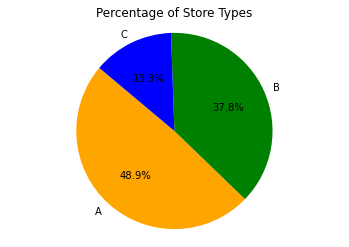

In [132]:
#Visualizing the Type of the Stores along with their percentage

import matplotlib.pyplot as plt


labels = df_stores["Type"].value_counts()[:10].index
values = df_stores["Type"].value_counts()[:10].values
colors = ['orange', 'green', 'blue']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Percentage of Store Types')

plt.show()


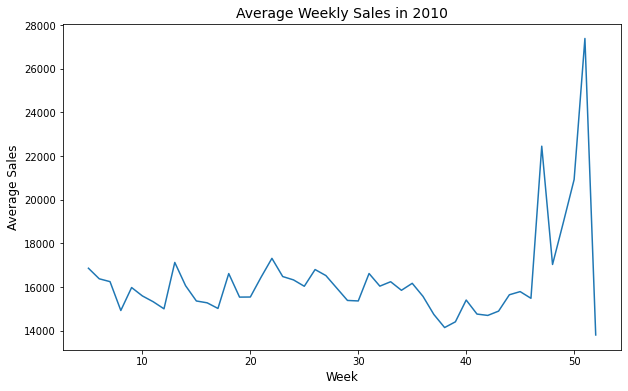

In [136]:

weekly_sales_2010 = df[df['Year']==2010]['Weekly_Sales'].groupby(df['Week']).mean()

plt.figure(figsize=(10, 6)) 
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values) # for plotting then lineplot

plt.title('Average Weekly Sales in 2010', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

plt.show()

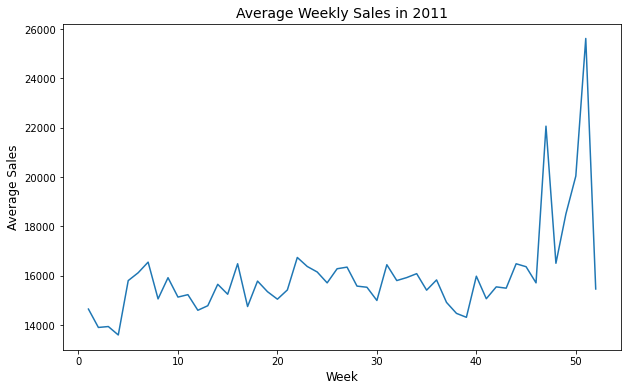

In [137]:
weekly_sales_2011 = df[df['Year']==2011]['Weekly_Sales'].groupby(df['Week']).mean()

plt.figure(figsize=(10, 6)) 
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values) # for plotting then lineplot

plt.title('Average Weekly Sales in 2011', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

plt.show()

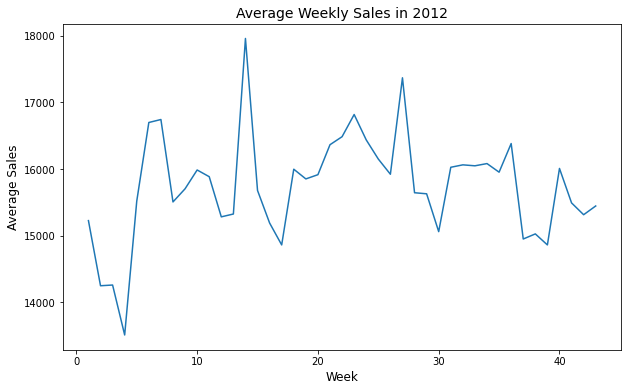

In [138]:
weekly_sales_2012 = df[df['Year']==2012]['Weekly_Sales'].groupby(df['Week']).mean()

plt.figure(figsize=(10, 6)) 
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values) # for plotting then lineplot

plt.title('Average Weekly Sales in 2012', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

plt.show()

#datset has data until 26th of October 2012

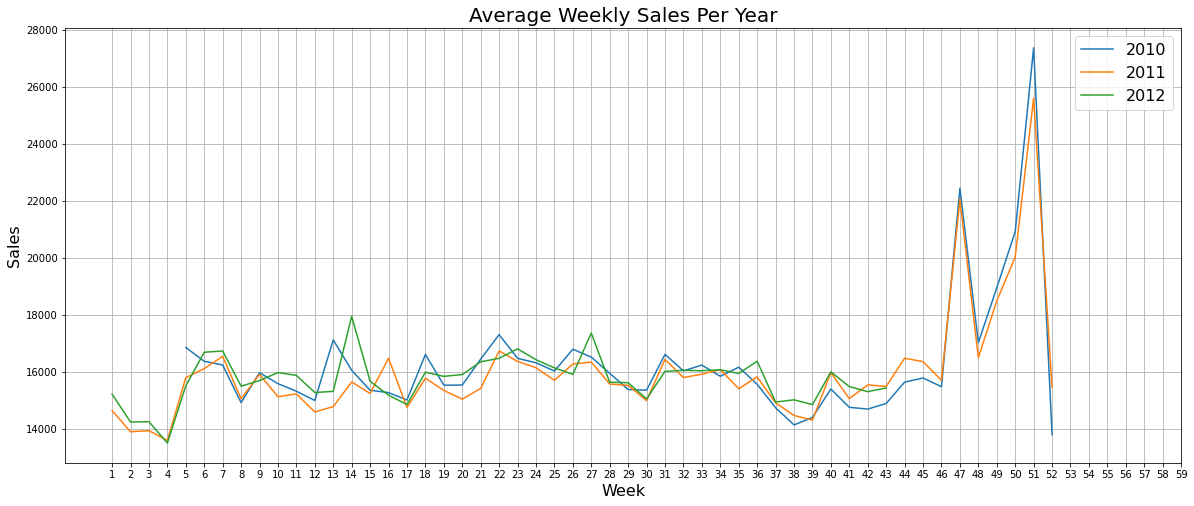

In [139]:
# Plotting the above three plot together 
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

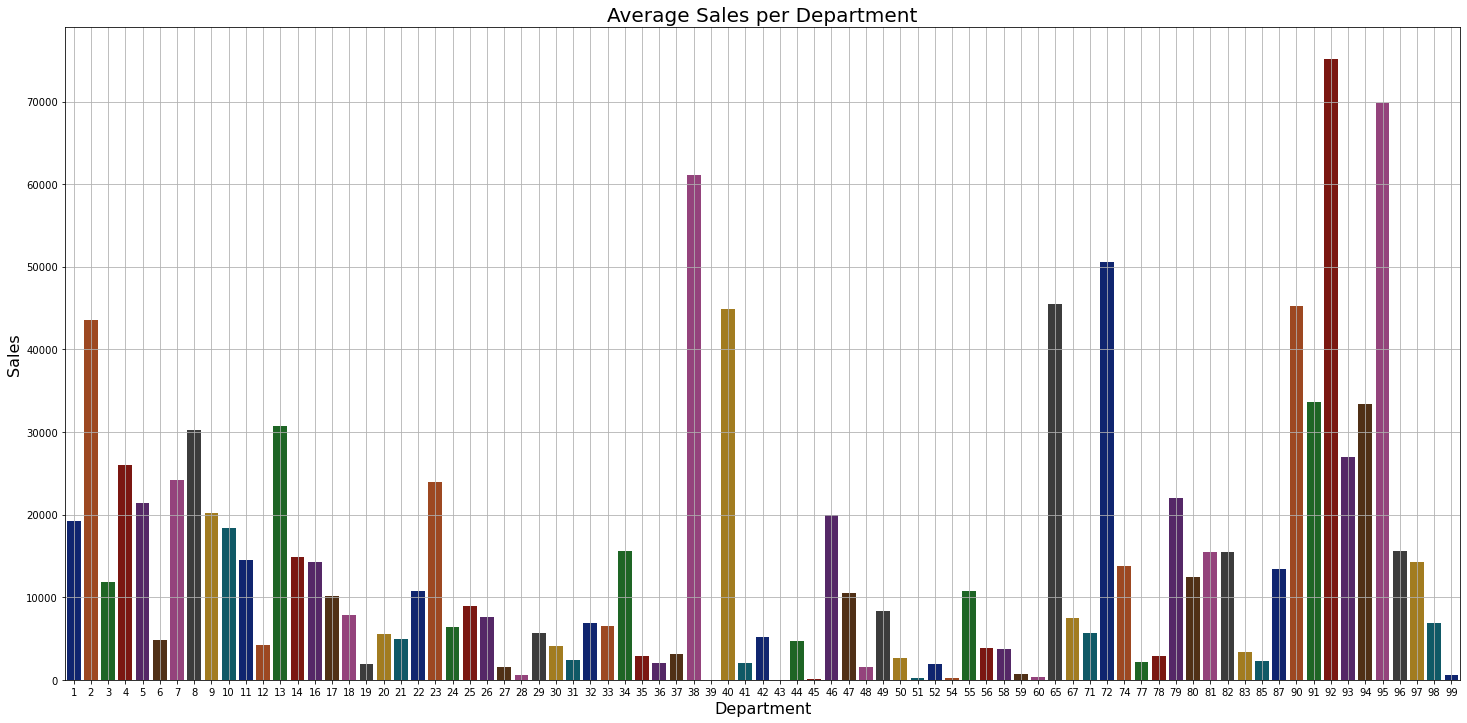

In [141]:
# Average Sales per Department

weekly_sales = df['Weekly_Sales'].groupby(df['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

There are 99 department but some of departments are missing.

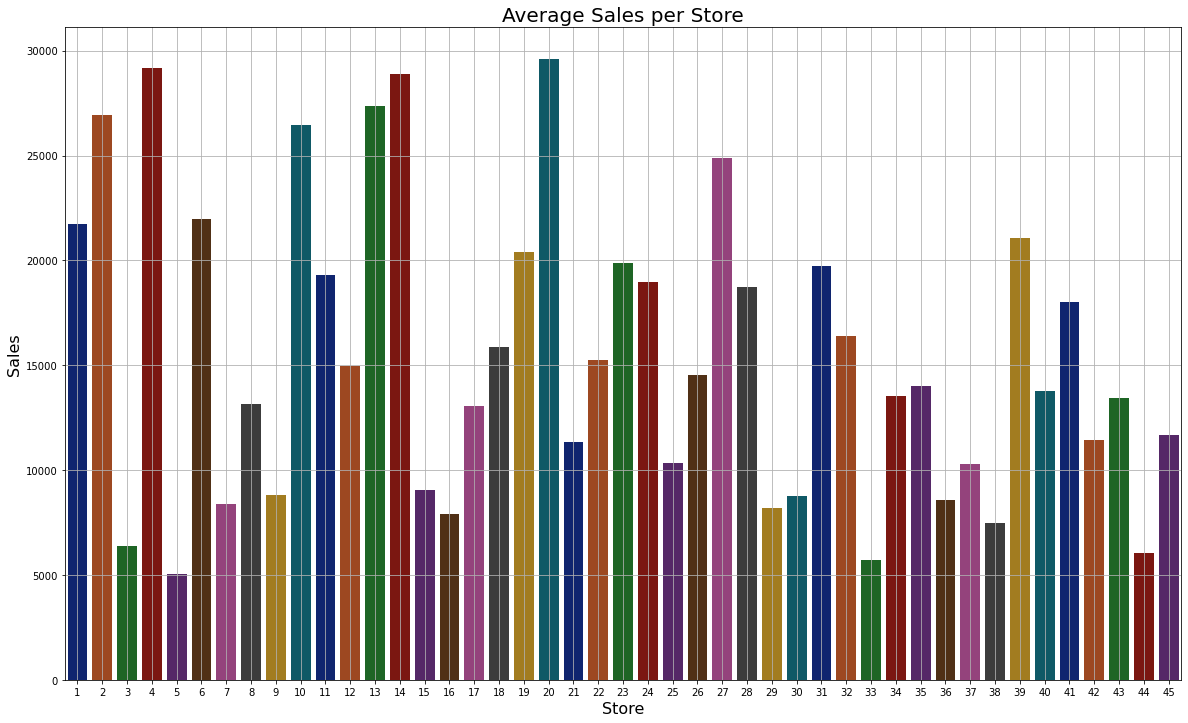

In [142]:
# Average Sales per Store

weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
